In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import scipy

In [35]:
_VIDEO_PATH = 'D:\\data\\dehaze\\'

In [96]:
video_name = 'oto_1.mp4'

cap = cv2.VideoCapture(os.path.join(_VIDEO_PATH,video_name))

list_frames = []
while(cap.isOpened()):
    _, frame = cap.read()
    list_frames.append(frame)
    if len(list_frames) == 10:
        cap.release()

In [97]:
# plt.imshow(list_frames[0])

In [98]:
# frame_prev = cv2.cvtColor(list_frames[0], cv2.COLOR_BGR2GRAY)
# frame_curr = cv2.cvtColor(list_frames[1], cv2.COLOR_BGR2GRAY)
# frame_next = cv2.cvtColor(list_frames[2], cv2.COLOR_BGR2GRAY)

In [99]:
# flow_1 = cv2.calcOpticalFlowFarneback(frame_prev, frame_curr, 
#                                     None, pyr_scale = 0.5, 
#                                     levels = 5, winsize = 11, 
#                                     iterations = 5, poly_n = 5, 
#                                     poly_sigma = 1.1, flags = 0)

# flow_2 = cv2.calcOpticalFlowFarneback(frame_curr, frame_next, 
#                                     None, pyr_scale = 0.5, 
#                                     levels = 5, winsize = 11, 
#                                     iterations = 5, poly_n = 5, 
#                                     poly_sigma = 1.1, flags = 0)

In [100]:
def cal_dense_optical_flow(frame_1, frame_2):
    mask = np.zeros_like(frame_1)
    frame_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2GRAY)
    mask[..., 1] = 255
    frame_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(frame_1, frame_2, 
                                    None, pyr_scale = 0.5, 
                                    levels = 5, winsize = 11, 
                                    iterations = 5, poly_n = 5, 
                                    poly_sigma = 1.1, flags = 0)

#     magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
#     mask[..., 0] = angle * 180 / np.pi / 2
#     mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
#     bgr = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
#     plt.imshow(flow[...,0])
#     print(np.min(flow[...,0]), np.max(flow[...,0]))
    # Normalize horizontal and vertical components
    horz = cv2.normalize(flow[...,0], None, 0, 255, cv2.NORM_MINMAX)     
    vert = cv2.normalize(flow[...,1], None, 0, 255, cv2.NORM_MINMAX)
    horz = horz.astype('uint8')
    vert = vert.astype('uint8')
    mask[..., 0] = vert
    mask[..., 2] = horz
    bgr = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
#     return horz, vert
    return bgr

In [101]:
flow_1 = cal_dense_optical_flow(list_frames[7], list_frames[8])
flow_2 = cal_dense_optical_flow(list_frames[8], list_frames[9])

# horz_1, vert_1 = cal_dense_optical_flow(list_frames[0], list_frames[1])
# horz_2, vert_2 = cal_dense_optical_flow(list_frames[1], list_frames[2])

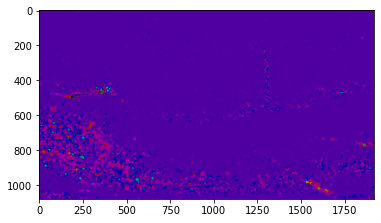

In [111]:
plt.imshow(flow_2)

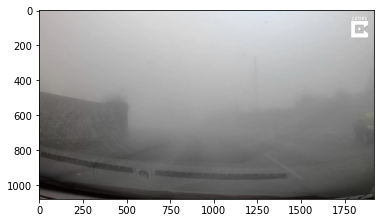

In [116]:
plt.imshow(list_frames[1])

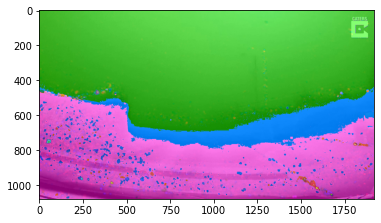

In [113]:
diff_prev_flow = np.subtract(list_frames[1], flow_1)/255
plt.imshow(diff_prev_flow)

In [115]:
# diff_prev_flow

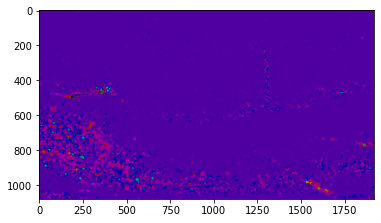

In [108]:
fw_error = np.subtract(list_frames[1], diff_prev_flow)
plt.imshow(fw_error, cmap='rainbow')

In [105]:
np.max(fw_error), np.min(fw_error)

(254, 0)

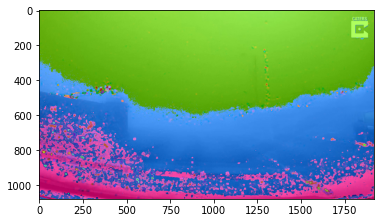

In [106]:
diff_prev_flow = np.subtract(list_frames[1], flow_2)
plt.imshow(diff_prev_flow)

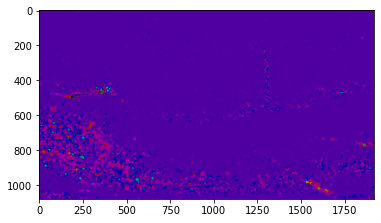

In [107]:
fw_error = np.subtract(list_frames[1], diff_prev_flow)
plt.imshow(fw_error, cmap='rainbow')